In [180]:
import numpy as np
import pickle
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [181]:
# Open the file in read mode
with open("index_history.pkl", "rb") as file:
    # Load the data from the file
    data = pickle.load(file, encoding='latin1')

In [182]:

# Define the file paths
file_paths = ["index_history.pkl", "saved_indexes.pkl", "saved_symbols.pkl", "ticker_history.pkl"]

# Load the data from each file
data_dict = {}

for path in file_paths:
    with open(path, "rb") as file:
        data = pickle.load(file, encoding='latin1')
        data_dict[path] = data

# Access the loaded data
index_history = data_dict["index_history.pkl"]
saved_indices = data_dict["saved_indexes.pkl"]
saved_tickers = data_dict["saved_symbols.pkl"]
ticker_history = data_dict["ticker_history.pkl"]

# Print some information about the loaded data (optional)
print("Index History:", type(index_history), len(index_history))
print("Saved Indices:", type(saved_indices), len(saved_indices))
print("Saved Tickers:", type(saved_tickers), len(saved_tickers))
print("Ticker History:", type(ticker_history), len(ticker_history))


Index History: <class 'dict'> 20
Saved Indices: <class 'list'> 20
Saved Tickers: <class 'list'> 101
Ticker History: <class 'dict'> 101


In [283]:
for index_name in saved_indices:
    index_history[index_name]['log_returns'] = np.log10(index_history[index_name]['Open']/index_history[index_name]['Open'][0])
    index_history[index_name]['date'] = index_history[index_name].index.date

In [284]:
date0=index_history['^BFX'].index[0].date().strftime('%m-%d-%Y')

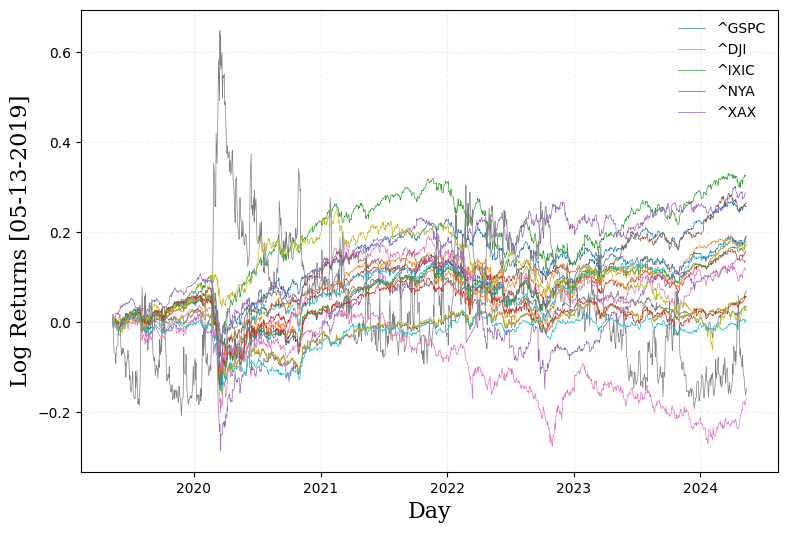

In [285]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

for i, index_name in enumerate(saved_indices):
    if i < 5:
        ax.plot(index_history[index_name]['log_returns'], lw=0.5, label=index_name)
    else:
        ax.plot(index_history[index_name]['log_returns'], lw=0.5)

ax.set_ylabel(r'Log Returns [{}]'.format(date0), fontsize=16, fontfamily='serif')
ax.set_xlabel(r'Day', fontsize=16, fontfamily='serif')

ax.grid(ls='--', alpha=0.2)

ax.legend(frameon=False)

plt.savefig('index_history_log_returns.png', dpi=300, bbox_inches='tight')

plt.show()

In [289]:
for ticker_name in saved_tickers:
    ticker_history[ticker_name]['log_returns'] = np.log10(ticker_history[ticker_name]['Open']/ticker_history[ticker_name]['Open'][0])
    ticker_history[ticker_name]['date'] = ticker_history[ticker_name].index.date

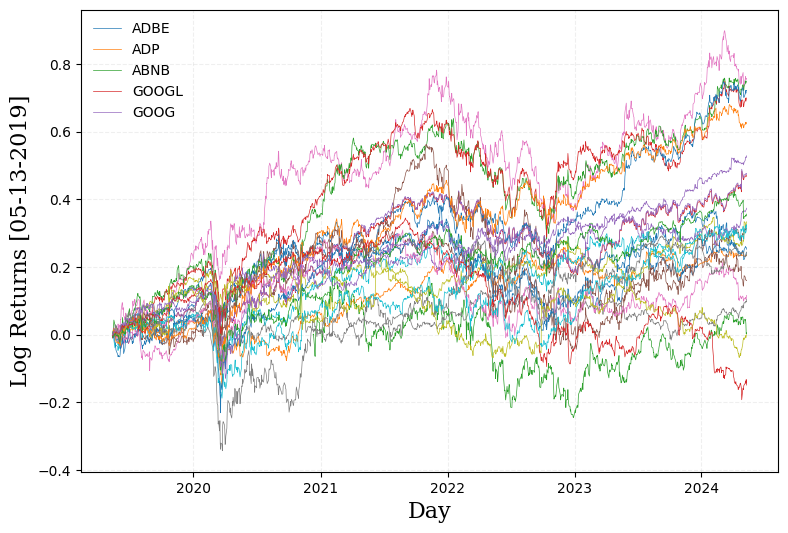

In [290]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

for i, ticker_name in enumerate(saved_tickers):
    if i < 5:
        ax.plot(ticker_history[ticker_name]['log_returns'], lw=0.5, label=ticker_name)
    elif i < 25:
        ax.plot(ticker_history[ticker_name]['log_returns'], lw=0.5)

ax.set_ylabel(r'Log Returns [{}]'.format(date0), fontsize=16, fontfamily='serif')
ax.set_xlabel(r'Day', fontsize=16, fontfamily='serif')

ax.grid(ls='--', alpha=0.2)

ax.legend(frameon=False)

plt.savefig('ticker_history_log_returns.png', dpi=300, bbox_inches='tight')

plt.show()

In [241]:
X1 = index_history['^IXIC']['log_returns'].values
X2 = index_history['^NYA']['log_returns'].values
Y = ticker_history['ADBE']['log_returns'].values

In [304]:
mutual_dates=np.array([x for x in index_history['^HSI']['date'].values if x in ticker_history['ADBE']['date'].values])

In [310]:
df1=ticker_history['ADBE']
df2=index_history['^HSI']
df1=df1.loc[df1['date'].isin(mutual_dates)]
df2=df2.loc[df2['date'].isin(mutual_dates)]
X3 = df2['log_returns']
Y3 = df1['log_returns']

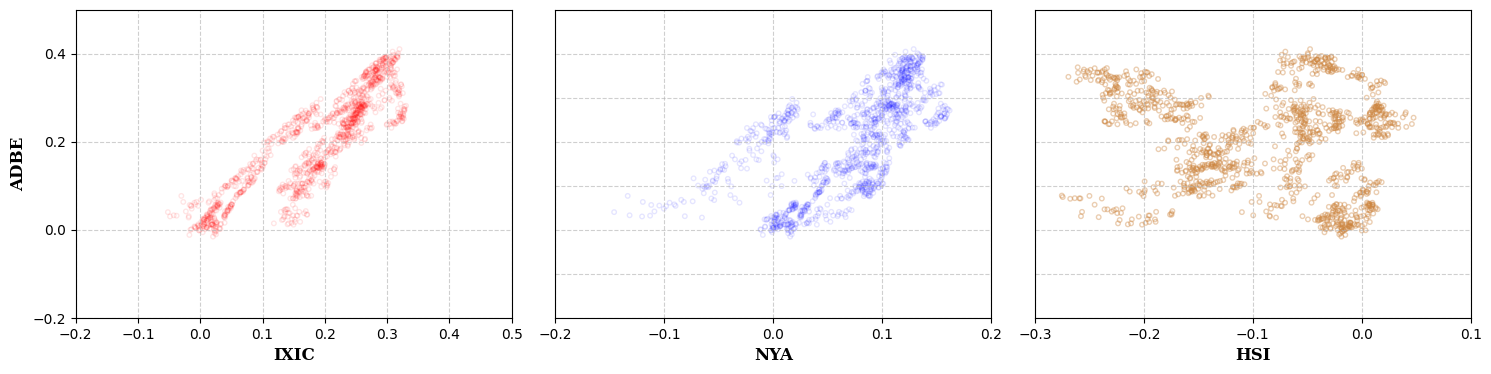

In [336]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

ax[0].scatter(X1, Y, marker='o', facecolors='none', edgecolors='r', s=10.5, alpha=0.1)
ax[0].set_ylabel(r'ADBE', fontsize=12, fontfamily='serif', weight='bold')
ax[0].set_xlabel(r'IXIC', fontsize=12, fontfamily='serif', weight='bold')

ax[1].scatter(X2, Y, marker='o', facecolors='none', edgecolors='b', s=10.5, alpha=0.1)
ax[1].set_xlabel(r'NYA', fontsize=12, fontfamily='serif', weight='bold')


ax[2].scatter(X3, Y3, marker='o', facecolors='none', edgecolors='peru', s=10.5, alpha=0.4)
ax[2].set_xlabel(r'HSI', fontsize=12, fontfamily='serif', weight='bold')

ax[1].tick_params(left=False, labelleft=False)
ax[2].tick_params(left=False, labelleft=False)

ax[0].set_xlim([-0.2, 0.5])
ax[1].set_xlim([-0.2, 0.2])
ax[2].set_xlim([-0.3, 0.1])
ax[1].set_xticks([-0.2, -0.1, 0.0, 0.1, 0.2])
ax[2].set_xticks([-0.3, -0.2, -0.1, 0.0, 0.1])
ax[0].set_yticks([-0.2, 0.0, 0.2, 0.4])

for axis in ax:
    axis.grid(True, which='both', axis='both', ls='--', alpha=0.6)

for i, axis in enumerate(ax):
    axis.set_ylim([-0.2, 0.5])

plt.subplots_adjust(wspace=0.1, hspace=0)

plt.savefig('ticker_index_correlation_example.png', dpi=300, bbox_inches='tight')

plt.show()